# DYU Text mining workshop

In [94]:
# !pip install pandas
# !pip install seaborn
# !pip install jieba
# !pip install wordcloud
# !pip install jiagu
# !pip install opencc-python-reimplemented
# !pip install snownlp

## Import packages

In [1]:
import requests
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.rcParams['axes.unicode_minus']=False

import jieba
import wordcloud 

# import jiagu
from opencc import OpenCC
from snownlp import SnowNLP

## Udn news

### Step1: Request

In [17]:
url = 'https://udn.com/api/more?page=700&id=search:台積電&channelId=2&type=searchword'
resp = requests.get(url)
resp.json()

{'state': True,
 'page': 700,
 'end': True,
 'lists': [{'url': 'https://pgw.udn.com.tw/gw/photo.php?u=https://uc.udn.com.tw/photo/2014/07/29/99/126998.jpg',
   'titleLink': 'https://fund.udn.com/fund/story/5879/175767',
   'title': '基金facebook／鐘國忠投資三心法 搶賺龍年財',
   'paragraph': '【經濟日報╱文／魏興中】台股兔年封關。回顧過去、展望未來，日盛投顧分析師鐘國忠認為，龍年台股行情雖不看淡，但由於外在不確定性變因增加，使操作難度明顯提升，不過，秉持「投資目的、慎選老闆、景氣燈號」三...',
   'cateLink': 'https://fund.udn.com',
   'cateTitle': '基金',
   'time': {'dateTime': '2012-01-30 00:00:00', 'date': '2012-01-30 00:00:00'}},
  {'url': 'https://pgw.udn.com.tw/gw/photo.php?u=https://uc.udn.com.tw/photo/2014/07/29/99/126900.jpg',
   'titleLink': 'https://fund.udn.com/fund/story/5879/175628',
   'title': '基金facebook／陸行之 努力+努力 唯一心法',
   'paragraph': '【經濟日報╱文／溫建勳】巴克萊證券亞太半導體首席分析師陸行之，在外資圈素有「半導體一哥」的美名，甚至有人慕名而到巴克萊工作，希望從他身上學習如何成為研究產業的頂尖高手。但對他而言，化繁為簡的心法是：...',
   'cateLink': 'https://fund.udn.com',
   'cateTitle': '基金',
   'time': {'dateTime': '2012-01-16 00:00:00', 'date': '2012-01-16 00:00:00'}},
  {'u

### Step2: To DataFrame

In [18]:
url = 'https://udn.com/api/more?page=700&id=search:台積電&channelId=2&type=searchword'
resp = requests.get(url)
pd.DataFrame(resp.json()['lists'])

,url,titleLink,title,paragraph,cateLink,cateTitle,time
0,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://fund.udn.com/fund/story/5879/175767,基金facebook／鐘國忠投資三心法 搶賺龍年財,【經濟日報╱文／魏興中】台股兔年封關。回顧過去、展望未來，日盛投顧分析師鐘國忠認為，龍年台股...,https://fund.udn.com,基金,"{'dateTime': '2012-01-30 00:00:00', 'date': '2..."
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://fund.udn.com/fund/story/5879/175628,基金facebook／陸行之 努力+努力 唯一心法,【經濟日報╱文／溫建勳】巴克萊證券亞太半導體首席分析師陸行之，在外資圈素有「半導體一哥」的美...,https://fund.udn.com,基金,"{'dateTime': '2012-01-16 00:00:00', 'date': '2..."
2,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://health.udn.com/health/story/6032/357828,台積電員工「享瘦」 10周減20公斤,【聯合報╱記者周宗禎／台南報導】 台積電南科廠區上萬員工有4成過胖，廠方警覺辦「健康享瘦營」...,https://health.udn.com,元氣網,"{'dateTime': '2011-11-26 00:00:00', 'date': '2..."
3,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://health.udn.com/health/story/5964/355750,哪家公司午覺時間最長、哪家又可玩社團？,【元氣周報／記者薛翔之、賴昭穎、孫中英、朱婉寧、羅介妤、黃郁文／報導】上班族中午休息時間，有...,https://health.udn.com,元氣網,"{'dateTime': '2011-08-15 00:00:00', 'date': '2..."
4,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://health.udn.com/health/story/5999/351111,爆肝族：終於有保障了,【聯合報╱記者李青霖／新竹市報導】「真的嗎？太好了！」科技業「爆肝」多，新竹科學園區一名半導...,https://health.udn.com,元氣網,"{'dateTime': '2010-12-23 00:00:00', 'date': '2..."
5,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://health.udn.com/health/story/5999/351113,過勞死標準放寬 新增四項疾病認定,【聯合報╱記者湯雅雯、李青霖／台北—新竹連線報導】 高科技業常以「責任制」為由，未保留員工出...,https://health.udn.com,元氣網,"{'dateTime': '2010-12-23 00:00:00', 'date': '2..."
6,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6445/221292,曹興誠：兒不接班 不辦豪門婚禮,【聯合報╱記者何醒邦／台北報導】 六十三歲聯電榮譽董事長曹興誠昨天接受電視專訪，談到敏...,https://theme.udn.com,時事話題,"{'dateTime': '2010-04-10 00:00:00', 'date': '2..."
7,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://health.udn.com/health/story/5999/344702,止痛晶片 刷一下3個月不痛,【聯合晚報／記者王彩鸝／台北報導】一片十元大小的晶片植入腰部，身體疼痛時，只要用結合手機的感...,https://health.udn.com,元氣網,"{'dateTime': '2009-11-25 00:00:00', 'date': '2..."
8,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6404/220445,「經營」公益變獨大 就危險了,【聯合報/記者張錦弘、陳惠惠、 鄭朝陽、梁玉芳】問：你們當志工導正一些不幸家庭的孩子，最擔心...,https://theme.udn.com,時事話題,"{'dateTime': '2008-11-03 00:00:00', 'date': '2..."
9,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6439/220959,郭媽：我要馨瑩當女兒,【聯合報╱記者鄒秀明／台北報導】 鴻海董事長郭台銘與曾馨瑩昨晚舉辦婚宴，君悅飯店大廳用紅色...,https://theme.udn.com,時事話題,"{'dateTime': '2008-07-30 00:00:00', 'date': '2..."


### Step3: Loop

In [20]:
for page in range(1, 10):
    url = f'https://udn.com/api/more?page={page}&id=search:台積電&channelId=2&type=searchword'
    print(url)

https://udn.com/api/more?page=1&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=2&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=3&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=4&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=5&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=6&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=7&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=8&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=9&id=search:台積電&channelId=2&type=searchword


### Step4: Concat

In [22]:
df = []
for page in range(1, 10):
    url = f'https://udn.com/api/more?page={page}&id=search:台積電&channelId=2&type=searchword'
    print(url)
    resp = requests.get(url)
    ndf = pd.DataFrame(resp.json()['lists'])
    df.append(ndf)
df = pd.concat(df, ignore_index=True)
df

https://udn.com/api/more?page=1&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=2&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=3&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=4&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=5&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=6&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=7&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=8&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=9&id=search:台積電&channelId=2&type=searchword


,url,titleLink,title,paragraph,cateLink,cateTitle,time
0,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6811/5871785,美國股市再創新高！基建法過關加添柴火 下周焉能不漲,美國股市周五再創歷史最高水準，由於美國10月就業數字強勁，加上輝瑞新冠口服藥成效顯著，激勵凡...,https://udn.com/news/cate/7225,全球,"{'dateTime': '2021-11-06 18:21:08', 'date': '2..."
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7326/5871010,台南就業旺！新營就博會5380職缺 三井outlet19日徵才,台南市政府今年最後一場大型徵才活動「台南好生活 台南呷頭路」就業博覽會，今在新營體育場外廣場...,https://udn.com/news/cate/6641,地方,"{'dateTime': '2021-11-06 11:44:08', 'date': '2..."
2,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5870997,劉揚偉：美缺半導體基礎設施 估設廠成本較中國翻倍,鴻海（2317）董事長劉揚偉今日席在線上舉辦的2021美台高科技論壇，回應外界提問指出，美國...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-06 11:41:10', 'date': '2..."
3,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5870903,重返母校淡江 陳進財：逆境才是人可以成長的環境,穩懋（3105）暨聯茂（6213）董事長陳進財今日重返母校淡江並獲授予名譽博士學位，他演講並...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-06 11:03:11', 'date': '2..."
4,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5870807,劉揚偉：美國缺半導體基礎設施 設廠成本可能翻倍,鴻海董事長劉揚偉今天出席在線上舉辦的2021美台高科技論壇時表示，美國缺乏半導體基礎設施，設...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-06 10:04:41', 'date': '2..."
...,...,...,...,...,...,...,...
175,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7238/5856502,【財經展望周報】英特爾新處理器上市挑戰台積電／10月消費者物價指數能否下降？,美國晶片大廠英特爾（Intel）改變過去針對桌上型電電腦和筆電分開設計不同處理器後，推出全新...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-01 08:02:00', 'date': '2..."
176,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6811/5857429,今天開盤前 五件國際事不可不知,美國股市上周五（29日）擺脫蘋果和亞馬遜財報利空的影響，尾盤由黑翻紅，三大指數同創歷史新高，...,https://udn.com/news/cate/7225,全球,"{'dateTime': '2021-11-01 06:56:07', 'date': '2..."
177,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7241/5857196,投資生醫／陳華鍵：精準醫療 磁吸聰明錢,生技產業五花八門，但聰明錢已悄悄看上「精準醫療」領域，例如專責「數據產生」的美國生技公司iI...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-01 02:54:12', 'date': '2..."
178,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7251/5857190,台股突圍 基本面當靠山,台股近來雖高檔承壓，不過隨美股道瓊等指數再創歷史新高，加上預期上市櫃10月營收將亮麗可期，市...,https://udn.com/news/cate/6645,股市,"{'dateTime': '2021-11-01 01:09:21', 'date': '2..."


In [24]:
ndf.shape[0]

20

### Step5: While loop

In [2]:
df = []
page = 1
while True:
    try:
        url = f'https://udn.com/api/more?page={page}&id=search:台積電&channelId=2&type=searchword'
        print(url)
        resp = requests.get(url)
        ndf = pd.DataFrame(resp.json()['lists'])
        df.append(ndf)
        page = page+1
    except:
        print('Error and retry.')
    if ndf.shape[0] < 20:
        break
df = pd.concat(df, ignore_index=True)
df

https://udn.com/api/more?page=1&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=2&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=3&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=4&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=5&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=6&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=7&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=8&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=9&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=10&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=11&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=12&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=13&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=14&i

,url,titleLink,title,paragraph,cateLink,cateTitle,time
0,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/12539/5884419,台南藍綠公投宣講車拚 公投大家挺VS.4個不同意,台南市藍綠營今晚公投拚場，國民黨在人潮數千的花園夜市宣講，要大家投同意票，當國家的頭家；民進...,https://udn.com/news/cate/6638,要聞,"{'dateTime': '2021-11-11 21:12:10', 'date': '2..."
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/122554/5884289,台積電產生短鏈效應 上下游「小雞」磁吸落腳高雄,台積電宣布投資高雄，市長陳其邁透露，從上游晶片到下游應用服務，高雄將陸續宣布大廠投資計畫。南...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-11 20:27:08', 'date': '2..."
2,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/122218/5884273,美議員團結束3天訪問行程 11日晚間離台赴杜拜,美國聯邦參、眾議員六人以及隨行人員晚上结束訪台行程，搭乘晚間7時20分阿聯酋航空EK-367...,https://udn.com/news/cate/6638,要聞,"{'dateTime': '2021-11-11 20:22:04', 'date': '2..."
3,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6811/5884086,美要求半導體業者交資料 韓通商部長：下不為例,韓國產業通商資源部長官文勝煜（Moon Sung-wook）當地時間9日訪問美國，與美國商務...,https://udn.com/news/cate/7225,全球,"{'dateTime': '2021-11-11 18:39:11', 'date': '2..."
4,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5884072,光洋科董座鬧雙胞 台鋼：別扯台積電國安議題,國內靶材大廠光洋科近期爆發經營權之爭，5日該公司公告改由王炯棻擔任董事長，8日卻再公告董事長...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-11 18:33:10', 'date': '2..."
...,...,...,...,...,...,...,...
14180,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6445/220722,曹興誠 強硬聲明展現擔當,【記者陳令軒】 雙魚座個性的聯電董事長曹興誠，60大壽就在下周。受到蘇州和艦案影響，他挺身...,https://theme.udn.com,時事話題,"{'dateTime': '2006-06-29 00:00:00', 'date': '2..."
14181,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6445/220723,"曹興誠,衝勁十足 能賺敢賺",【記者詹惠珠、林宏文/台北】 聯電董事長曹興誠，在半導體業界一向被視為爭議性人物，但談到他...,https://theme.udn.com,時事話題,"{'dateTime': '2006-06-29 00:00:00', 'date': '2..."
14182,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6441/220700,華碩董座施崇棠 捐台大5.4億,【記者喻文玟／台北報導】華碩電腦董事長、台大電機系校友施崇棠，個人捐五億四千萬元協助台大興建...,https://theme.udn.com,時事話題,"{'dateTime': '2006-06-18 00:00:00', 'date': '2..."
14183,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6439/220693,郭台銘送妻最後一程…,【記者林信昌／台北報導】 鴻海集團總裁郭台銘昨（31）日神情哀淒，送愛妻林淑如最後一程，她將...,https://theme.udn.com,時事話題,"{'dateTime': '2006-06-15 00:00:00', 'date': '2..."


In [3]:
# df

### Step6: Save data

In [3]:
df.to_pickle('udnnews.pkl')
# df.to_csv('udnnews.csv')
# df.to_excel('udnnews.csv')

## TWSE

In [5]:
df = []
rs = requests.Session()
ymlist = pd.date_range(start='2020-01-01', end='2021-11-01', freq='MS')
for yyyymmdd in ymlist:
    ymd = yyyymmdd.strftime('%Y%m%d')
    url = f"https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date={ymd}&stockNo=2330"
    print(url)
    resp = rs.get(url)
    ndf = pd.DataFrame(data = resp.json()['data'],
                       columns=resp.json()['fields'])
    ndf['title'] = resp.json()['title']
    df.append(ndf)
    time.sleep(3)
df = pd.concat(df, ignore_index=True)
df

https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20200101&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20200201&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20200301&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20200401&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20200501&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20200601&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20200701&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20200801&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20200901&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20201001&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date

,Date,Trade Volume,Trade Value,Opening Price,Highest Price,Lowest Price,Closing Price,Change,Transaction,title
0,2020/01/02,"33,282,120","11,224,165,450",332.50,339.00,332.50,339.00,+8.00,"17,160",2020/01 Daily Trading Value/Volume of 2330
1,2020/01/03,"42,023,268","14,295,651,580",344.00,345.00,335.50,339.50,+0.50,"20,545",2020/01 Daily Trading Value/Volume of 2330
2,2020/01/06,"45,677,057","15,210,531,318",333.00,334.50,332.00,332.00,-7.50,"22,944",2020/01 Daily Trading Value/Volume of 2330
3,2020/01/07,"51,746,181","17,053,282,011",332.50,333.00,326.50,329.50,-2.50,"22,362",2020/01 Daily Trading Value/Volume of 2330
4,2020/01/08,"37,913,748","12,484,410,088",325.00,333.00,325.00,329.50,0.00,"18,228",2020/01 Daily Trading Value/Volume of 2330
...,...,...,...,...,...,...,...,...,...,...
449,2021/11/05,"35,086,799","20,974,569,571",598.00,600.00,595.00,600.00,+13.00,"31,929",2021/11 Daily Trading Value/Volume of 2330
450,2021/11/08,"20,886,897","12,544,595,323",600.00,602.00,598.00,602.00,+2.00,"17,964",2021/11 Daily Trading Value/Volume of 2330
451,2021/11/09,"42,340,785","25,935,652,781",611.00,617.00,610.00,611.00,+9.00,"42,855",2021/11 Daily Trading Value/Volume of 2330
452,2021/11/10,"18,518,512","11,303,615,778",611.00,612.00,608.00,612.00,+1.00,"19,147",2021/11 Daily Trading Value/Volume of 2330


In [6]:
df.to_pickle('twse_2330.pkl')

## Vis
- 可以照新聞類型來視覺化

### Vis1: udnnews counts by category 

In [65]:
news = pd.read_pickle('./udnnews.pkl')
news.head(3)

,url,titleLink,title,paragraph,cateLink,cateTitle,time
0,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/12539/5884419,台南藍綠公投宣講車拚 公投大家挺VS.4個不同意,台南市藍綠營今晚公投拚場，國民黨在人潮數千的花園夜市宣講，要大家投同意票，當國家的頭家；民進...,https://udn.com/news/cate/6638,要聞,"{'dateTime': '2021-11-11 21:12:10', 'date': '2..."
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/122554/5884289,台積電產生短鏈效應 上下游「小雞」磁吸落腳高雄,台積電宣布投資高雄，市長陳其邁透露，從上游晶片到下游應用服務，高雄將陸續宣布大廠投資計畫。南...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-11 20:27:08', 'date': '2..."
2,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/122218/5884273,美議員團結束3天訪問行程 11日晚間離台赴杜拜,美國聯邦參、眾議員六人以及隨行人員晚上结束訪台行程，搭乘晚間7時20分阿聯酋航空EK-367...,https://udn.com/news/cate/6638,要聞,"{'dateTime': '2021-11-11 20:22:04', 'date': '2..."


<AxesSubplot:xlabel='index', ylabel='cnt'>

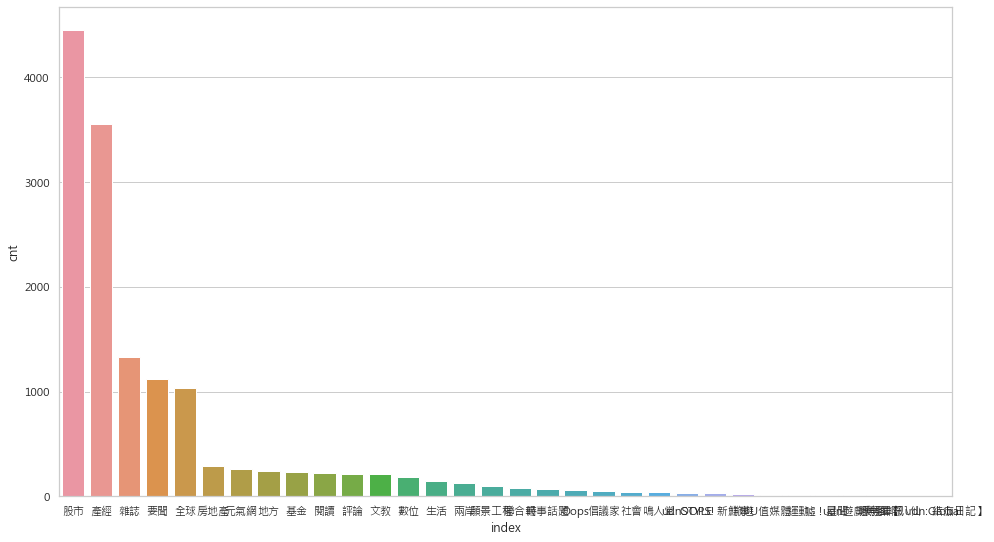

In [66]:
barplot_data = news['cateTitle'].value_counts()
barplot_data = barplot_data.reset_index(name='cnt')

plt.figure(figsize=(16,9))
sns.barplot(x='index', y='cnt', data=barplot_data)

### Vis2: udnnews counts by date 

In [67]:
news['Date'] = news['time'].apply(lambda x: x['dateTime'])
news['Date'] = news['Date'].apply(lambda x: x[:10])
news = news.loc[news['Date'].apply(lambda x: x >= '2021-01-01')]
news['Date'] = news['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

news = news.loc[news['cateTitle'].apply(lambda x: x in ['股市','產經','全球'])]
news.head(3)

,url,titleLink,title,paragraph,cateLink,cateTitle,time,Date
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/122554/5884289,台積電產生短鏈效應 上下游「小雞」磁吸落腳高雄,台積電宣布投資高雄，市長陳其邁透露，從上游晶片到下游應用服務，高雄將陸續宣布大廠投資計畫。南...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-11 20:27:08', 'date': '2...",2021-11-11
3,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6811/5884086,美要求半導體業者交資料 韓通商部長：下不為例,韓國產業通商資源部長官文勝煜（Moon Sung-wook）當地時間9日訪問美國，與美國商務...,https://udn.com/news/cate/7225,全球,"{'dateTime': '2021-11-11 18:39:11', 'date': '2...",2021-11-11
4,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5884072,光洋科董座鬧雙胞 台鋼：別扯台積電國安議題,國內靶材大廠光洋科近期爆發經營權之爭，5日該公司公告改由王炯棻擔任董事長，8日卻再公告董事長...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-11 18:33:10', 'date': '2...",2021-11-11


<AxesSubplot:xlabel='Date', ylabel='Cnt'>

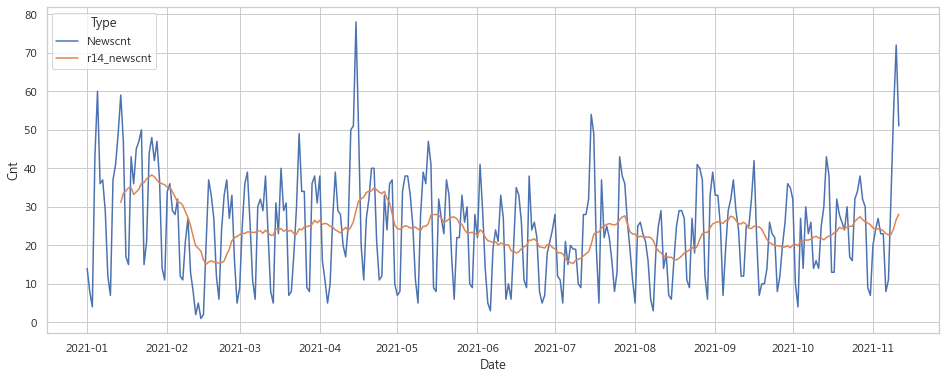

In [68]:
plotdf1 = news.groupby('Date').size().reset_index(name='Newscnt')
plotdf1['r14_newscnt'] = plotdf1['Newscnt'].rolling(window=14).mean()
plotdf1 = plotdf1.melt(id_vars='Date',
                       value_vars=['Newscnt', 'r14_newscnt'],
                       var_name='Type',
                       value_name='Cnt')
plt.figure(figsize=(16,6))
sns.lineplot(x='Date', y='Cnt', data=plotdf1, hue='Type')

In [69]:
plotdf1['r3_cnt'] = plotdf1['Cnt'].rolling(window=3).sum()
plotdf1.loc[:,['Date', 'Cnt', 'r3_cnt']].head(10)

,Date,Cnt,r3_cnt
0,2021-01-01,14.0,NaN
1,2021-01-02,8.0,NaN
2,2021-01-03,4.0,26.0
3,2021-01-04,43.0,55.0
4,2021-01-05,60.0,107.0
5,2021-01-06,36.0,139.0
6,2021-01-07,37.0,133.0
7,2021-01-08,29.0,102.0
8,2021-01-09,12.0,78.0
9,2021-01-10,7.0,48.0


### Vis3: tsmc closed price by date

<AxesSubplot:xlabel='Date', ylabel='Price'>

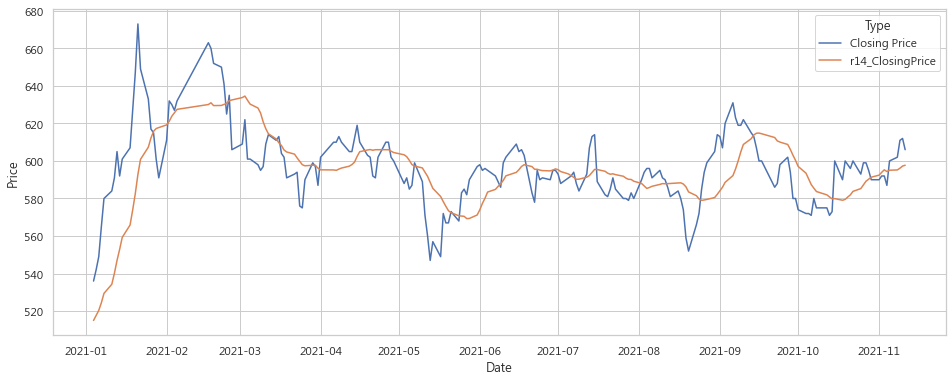

In [70]:
tsmc = pd.read_pickle('./twse_2330.pkl')

tsmc['Date'] = tsmc['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y/%m/%d').strftime('%Y-%m-%d'))

tsmc['Closing Price'] = tsmc['Closing Price'].apply(lambda x: float(x))
tsmc['r14_ClosingPrice'] = tsmc['Closing Price'].rolling(window=14).mean()

tsmc = tsmc.loc[tsmc['Date'].apply(lambda x: x >= '2021-01-01')]
tsmc['Date'] = tsmc['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

plotdf2 = tsmc.melt(id_vars='Date',value_vars=['Closing Price', 'r14_ClosingPrice'], var_name='Type', value_name='Price')
plt.figure(figsize=(16,6))
sns.lineplot(x='Date', y='Price', data=plotdf2, hue='Type')  

### Vis4: News volumn and tsmc closed price by date
- 每次波動(含正/負都會伴隨一些新聞聲量

No handles with labels found to put in legend.


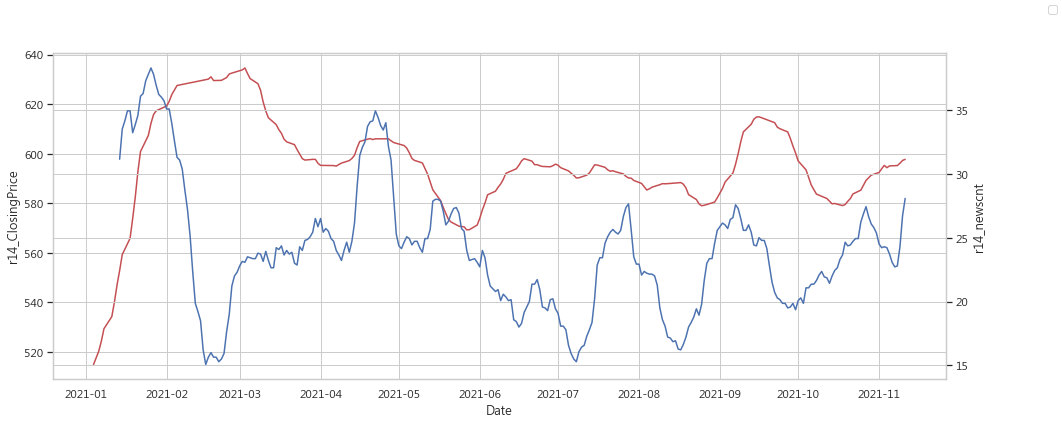

In [77]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x='Date', y='r14_ClosingPrice', data=tsmc, color="r" )   
ax2 = ax.twinx()
sns.lineplot(x='Date',
             y='r14_newscnt',
             data=plotdf1.pivot(index='Date', columns='Type', values='Cnt'),
             ax=ax2,
             color="b")   
ax.figure.legend()

<AxesSubplot:xlabel='Date', ylabel='r14_newscnt'>

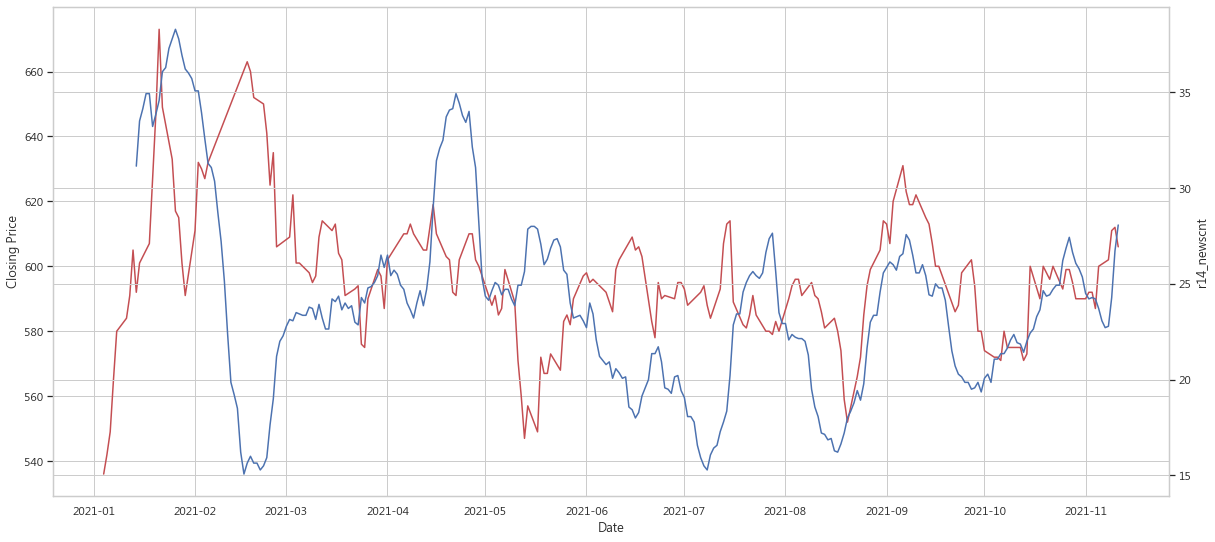

In [79]:
plt.figure(figsize=(20,9))
ax = sns.lineplot(x='Date', y='Closing Price', data=tsmc, color="r" )   
ax2 = ax.twinx()
sns.lineplot(x='Date',
             y='r14_newscnt',
             data=plotdf1.pivot(index='Date', columns='Type', values='Cnt'),
             ax=ax2,
             color="b")   

### Vis5: Word Cloud by condiction
- 文字雲除了漂亮之外，能提供的資訊其實很有限qq
- 但還是能看到一些正負向的情緒詞彙

In [83]:
tsmc['price_minus_r14price'] = tsmc['Closing Price'] - tsmc['r14_ClosingPrice']
tsmc['Date'] = tsmc['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
news['Date'] = news['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))

wcdf = pd.merge(left=news.loc[:,['title','Date']],
                right=tsmc.loc[:,['Date','Closing Price','r14_ClosingPrice', 'price_minus_r14price']],
                how='inner',
                on='Date')
wcdf.head()

,title,Date,Closing Price,r14_ClosingPrice,price_minus_r14price
0,台積電產生短鏈效應 上下游「小雞」磁吸落腳高雄,2021-11-11,606.0,597.714286,8.285714
1,美要求半導體業者交資料 韓通商部長：下不為例,2021-11-11,606.0,597.714286,8.285714
2,光洋科董座鬧雙胞 台鋼：別扯台積電國安議題,2021-11-11,606.0,597.714286,8.285714
3,台積電赴高雄設廠 沈榮津：水電問題「都處理好了」,2021-11-11,606.0,597.714286,8.285714
4,高市加速3年內整治台積電用地 環署：採多區併行,2021-11-11,606.0,597.714286,8.285714


In [93]:
words = ['台積電', '後悔', '報告', '三大法人', '英特爾','八年級', '少主', '公開', '脫鉤', '新冠', '過後', '生態', '台大', '清大', '半導體',
        '長榮', '擠下', '台股', '台指期' , '收盤' , '上漲', '大關', '稱霸', '謝金河', '成長', '黃捷', '開徵', '囤房稅', '陳其邁', '併行', '手軟', '上看',
        '出清', '搶救', '和碩' , '擁抱' , '元宇宙', '委託書', '護國神山', '民眾黨', '南電北送', '蔡英文', '效應', '領跌', '日月光', '航運', '營收', 
        '供應商', '動能', '房價', '光洋科']
for word in words:
    jieba.add_word(word)

In [94]:
wcdf['seg'] = wcdf['title'].apply(lambda x: ' '.join(jieba.lcut(x)))
wcdf

,title,Date,Closing Price,r14_ClosingPrice,price_minus_r14price,seg
0,台積電產生短鏈效應 上下游「小雞」磁吸落腳高雄,2021-11-11,606.0,597.714286,8.285714,台積電 產生 短鏈 效應 上下游 「 小雞 」 磁吸 落腳 高雄
1,美要求半導體業者交資料 韓通商部長：下不為例,2021-11-11,606.0,597.714286,8.285714,美 要求 半導體 業者 交資料 韓 通商部 長 ： 下不為 例
2,光洋科董座鬧雙胞 台鋼：別扯台積電國安議題,2021-11-11,606.0,597.714286,8.285714,光洋科 董座 鬧 雙胞 台鋼 ： 別扯 台積電 國安議題
3,台積電赴高雄設廠 沈榮津：水電問題「都處理好了」,2021-11-11,606.0,597.714286,8.285714,台積電 赴 高雄 設廠 沈榮津 ： 水電 問題 「 都 處理 好 了 」
4,高市加速3年內整治台積電用地 環署：採多區併行,2021-11-11,606.0,597.714286,8.285714,高市 加速 3 年 內 整治 台積電 用地 環署 ： 採多區 併行
...,...,...,...,...,...,...
6569,台積投資不手軟 帶旺協力廠,2021-01-04,536.0,515.000000,21.000000,台積 投資 不 手軟 帶旺 協力 廠
6570,台積今年股息 上看13元,2021-01-04,536.0,515.000000,21.000000,台積 今年 股息 上看 13 元
6571,國安基金出清持股 投入護盤7.5億元賺2億,2021-01-04,536.0,515.000000,21.000000,國安 基金 出清 持股 投入 護盤 7.5 億元 賺 2 億
6572,"台積資本支出 今年衝6,200億新高",2021-01-04,536.0,515.000000,21.000000,"台積 資本 支出 今年 衝 6 , 200 億 新高"


In [95]:
stop_words = ['在', '再', '年', '月', '日', '點', '了', '要','會', '有','看','台','都','與','元','中','的','嗎','從','仍','對','和','到',
             '也','可','第','誰','說','讓','他','是']

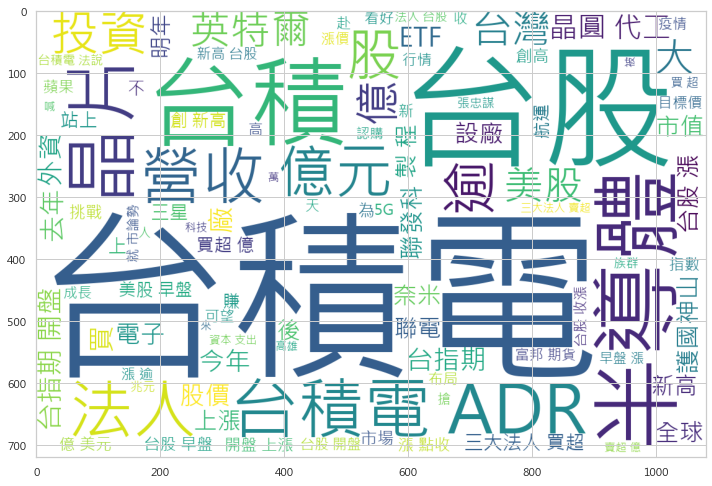

In [96]:
plt.figure(figsize=(12,9))
pos_news = ' '.join(wcdf.loc[wcdf['price_minus_r14price']>10]['seg'])
wc = wordcloud.WordCloud(background_color='white',
                         # margin=2, # 文字間距
                         font_path='./dyu_tm_workshop/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', # 設定字體
                         max_words=100, # 取多少文字在裡面
                         width=1080, 
                         height=720, # 長寬解析度
                         stopwords = stop_words
                         )
wc.generate_from_text(pos_news)
plt.imshow(wc)

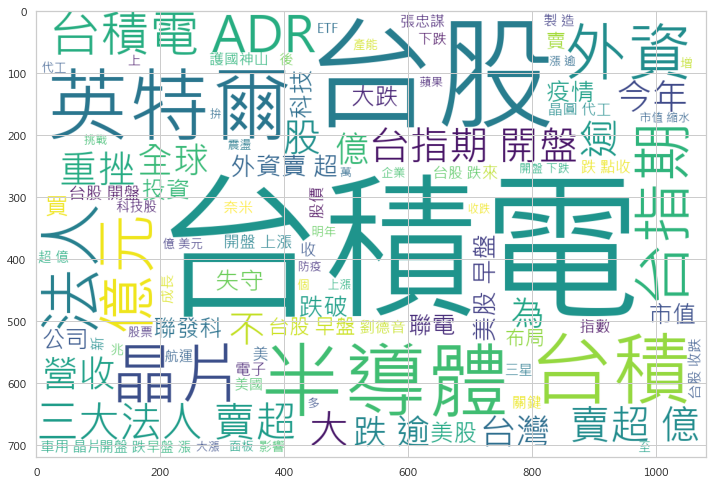

In [97]:
plt.figure(figsize=(12,9))
pos_news = ' '.join(wcdf.loc[wcdf['price_minus_r14price']<-10]['seg'])
wc = wordcloud.WordCloud(background_color='white',
                         # margin=2, # 文字間距
                         font_path='./dyu_tm_workshop/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', # 設定字體
                         max_words=100, # 取多少文字在裡面
                         width=1080, 
                         height=720, # 長寬解析度
                         stopwords = stop_words
                         )
wc.generate_from_text(pos_news)
plt.imshow(wc)

### Vis 6

In [117]:
plotdf1

,Date,Type,Cnt,r3_cnt
0,2021-01-01,Newscnt,14.000000,NaN
1,2021-01-02,Newscnt,8.000000,NaN
2,2021-01-03,Newscnt,4.000000,26.000000
3,2021-01-04,Newscnt,43.000000,55.000000
4,2021-01-05,Newscnt,60.000000,107.000000
...,...,...,...,...
625,2021-11-07,r14_newscnt,22.714286,69.500000
626,2021-11-08,r14_newscnt,22.785714,68.571429
627,2021-11-09,r14_newscnt,24.285714,69.785714
628,2021-11-10,r14_newscnt,26.714286,73.785714


In [135]:
# plotdf1['cnt_minus_r14_newscnt'] = plotdf1['cnt'] = plotdf1['r14_newscnt']
# plotdf1['Date'] = plotdf1['Date'].apply(lambda x: x.strftime('%Y-%m-%d')) 
plotdf3 = plotdf1.pivot(index='Date', columns='Type', values='Cnt').reset_index()
plotdf3['Date'] = plotdf3['Date'].apply(lambda x: x.strftime('%Y-%m-%d')) 
plotdf3['Newscnt_minus_r14_newscnt'] = plotdf3['Newscnt'] - plotdf3['r14_newscnt']

plotdf3 = pd.merge(left=tsmc.loc[:, ['Date', 'Closing Price', 'r14_ClosingPrice', 'price_minus_r14price']], 
                    right=plotdf3.loc[:, ['Date', 'r14_newscnt','Newscnt_minus_r14_newscnt']],
                    how='left',
                    on='Date')
plotdf3

,Date,Closing Price,r14_ClosingPrice,price_minus_r14price,r14_newscnt,Newscnt_minus_r14_newscnt
0,2021-01-04,536.0,515.000000,21.000000,NaN,NaN
1,2021-01-05,542.0,517.714286,24.285714,NaN,NaN
2,2021-01-06,549.0,520.357143,28.642857,NaN,NaN
3,2021-01-07,565.0,524.428571,40.571429,NaN,NaN
4,2021-01-08,580.0,529.428571,50.571429,NaN,NaN
...,...,...,...,...,...,...
204,2021-11-05,600.0,595.071429,4.928571,23.714286,-0.714286
205,2021-11-08,602.0,595.214286,6.785714,22.785714,10.214286
206,2021-11-09,611.0,596.142857,14.857143,24.285714,30.714286
207,2021-11-10,612.0,597.285714,14.714286,26.714286,45.285714


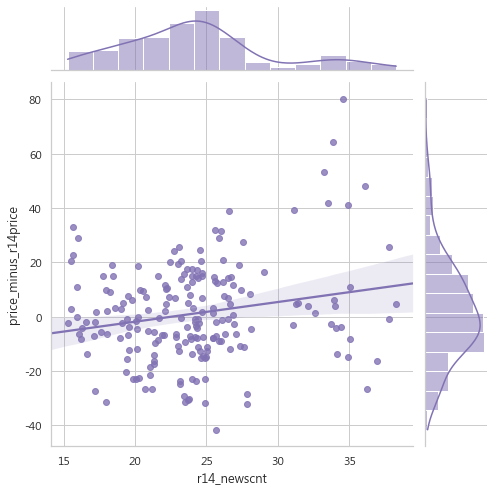

In [136]:
sns.jointplot(x="r14_newscnt",
              y="price_minus_r14price",
              data=plotdf3,
              kind="reg",
              truncate=False,
              color="m", height=7)

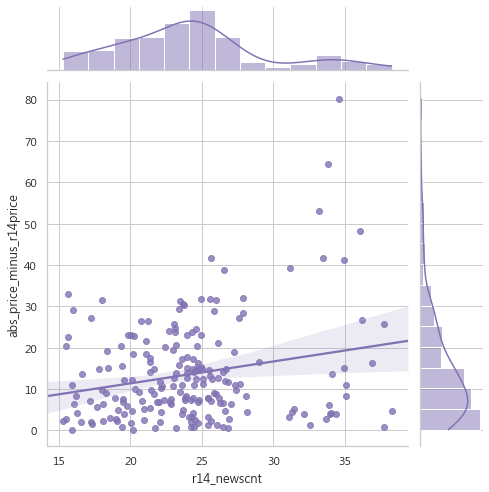

In [137]:
plotdf3['abs_price_minus_r14price'] = plotdf3['price_minus_r14price'].apply(lambda x: abs(x))
sns.jointplot(x="r14_newscnt",
              y="abs_price_minus_r14price",
              data=plotdf3,
              kind="reg",
              truncate=False,
              color="m", height=7)

In [138]:
plotdf3.corr()

,Closing Price,r14_ClosingPrice,price_minus_r14price,r14_newscnt,Newscnt_minus_r14_newscnt,abs_price_minus_r14price
Closing Price,1.000000,0.550262,0.500227,0.221817,0.123750,0.137236
r14_ClosingPrice,0.550262,1.000000,-0.447758,0.048042,0.029566,-0.290549
price_minus_r14price,0.500227,-0.447758,1.000000,0.203590,0.111210,0.448263
r14_newscnt,0.221817,0.048042,0.203590,1.000000,-0.051214,0.225303
Newscnt_minus_r14_newscnt,0.123750,0.029566,0.111210,-0.051214,1.000000,0.278056
abs_price_minus_r14price,0.137236,-0.290549,0.448263,0.225303,0.278056,1.000000


## NLP

### Sentiment analysis

#### WiserAI lab

In [235]:
url = 'https://www.wisers.ai/?api=ailab-demo-apilb.wisers.com:8000/senti/api/processtext'
data = {'text' : '幾十年來從沒像此時這麼的風雨飄搖',
        'model' :'dl',
        'output_level' : 'subject',
        'show_scores' :'true'}
resp = requests.post(url, json=data)
resp.json()

{'docid': None,
 'is_successful': True,
 'message': '',
 'overall_res': {'sentiment': -1, 'sentiment_score': 0.29},
 'detail_res': []}

#### NTU

#### Snownlp

In [97]:
s = SnowNLP('幾十年來從沒像此時這麼的風雨飄搖')
s.sentiments

0.16114447574259694

In [98]:
s = SnowNLP('几十年来从没像此时这么的风雨飘摇')
s.sentiments

0.23925934418361228

In [101]:
s = SnowNLP('從來沒有這麼開心過')
s.sentiments

0.11793756783243114

In [102]:
s = SnowNLP('从来没有这么开心过')
s.sentiments

0.6541633786877609

#### baidu

##### 登入

##### 爬蟲

In [104]:
url = 'https://ai.baidu.com/aidemo'
data = {'apiType': 'nlp', 'type': 'sentimentClassify', 't1': '配置顶级，不解释，手机需要的各个方面都很完美'}
resp = requests.post(url, data=data)
resp.json()

{'errno': 0,
 'msg': 'success',
 'data': {'log_id': '4374586231025068042',
  'text': '配置顶级，不解释，手机需要的各个方面都很完美',
  'items': [{'positive_prob': 0.999956,
    'confidence': 0.999901,
    'negative_prob': 4.44644e-05,
    'sentiment': 2}]}}

In [114]:
# rs = requests.Session()
# for i in range(100):
#     url = 'https://ai.baidu.com/aidemo'
#     data = {'apiType': 'nlp', 'type': 'sentimentClassify', 't1': '配置顶级，不解释，手机需要的各个方面都很完美'}
#     resp = rs.post(url, data=data)
#     print(resp.json())
#     print('==========')

In [113]:
resp

<Response [429]>

### 標註

In [139]:
# udnnews = pd.read_pickle('./udnnews.pkl')
cc = OpenCC('t2s')
news['ntitle'] = news['title'].apply(lambda x: cc.convert(x))
news['sentiment'] = news['ntitle'].apply(lambda x: SnowNLP(x).sentiments)
news['sentiment'] = (news['sentiment']-0.5)*2
news.sort_values('sentiment')

,url,titleLink,title,paragraph,cateLink,cateTitle,time,Date,ntitle,sentiment
3767,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7251/5632619,台股早盤跌逾300點 跌破「萬七」大關,台股今（28）日大跳水，盤中跌破季線後，跌勢一路擴大，失守「萬七」，下殺360點，最低來到1...,https://udn.com/news/cate/6645,股市,"{'dateTime': '2021-07-28 09:50:12', 'date': '2...",2021-07-28,台股早盘跌逾300点 跌破「万七」大关,-0.999773
9341,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7251/5273303,"台股震盪走低大跌230點收16,212點 台積收625元跌破月線",台股今（24）日震盪走低，早盤多方兩度拉抬指數回到平盤之上，不過午盤過後賣壓出籠，指數跌幅一...,https://udn.com/news/cate/6645,股市,"{'dateTime': '2021-02-24 13:43:07', 'date': '2...",2021-02-24,"台股震荡走低大跌230点收16,212点 台积收625元跌破月线",-0.999761
4035,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7255/5616998,台指期結算收低 8月合約收盤下跌57點,"台指期今（21）日進行結算，8月合約收盤指數為17,279點，下跌57點，成交量69,098...",https://udn.com/news/cate/6645,股市,"{'dateTime': '2021-07-21 13:54:10', 'date': '2...",2021-07-21,台指期结算收低 8月合约收盘下跌57点,-0.999710
1091,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7251/5816324,"台股上漲39點收16,387點 台積電收盤上漲2元","台股今（14）日收盤上漲39.29點，收盤指數16,387.28點，成交量2,563.52億...",https://udn.com/news/cate/6645,股市,"{'dateTime': '2021-10-14 13:46:12', 'date': '2...",2021-10-14,"台股上涨39点收16,387点 台积电收盘上涨2元",-0.999703
10160,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7251/5204763,"跌破10日線！台股大跌287點 15,658點作收",春節前賣壓出籠，台股今（26）日跌破10日均線，且一度大跌逾300點，尾盤過後買單敲進台積電...,https://udn.com/news/cate/6645,股市,"{'dateTime': '2021-01-26 13:53:09', 'date': '2...",2021-01-26,"跌破10日线！台股大跌287点 15,658点作收",-0.999701
...,...,...,...,...,...,...,...,...,...,...
8383,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5342347,5G戰火旺 聯發科反攻高階市場的祕密武器,市場傳出手機晶片大廠聯發科（2454）年底推出的高階5G晶片，採用台積電5奈米製程生產，報價...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-03-25 10:54:54', 'date': '2...",2021-03-25,5G战火旺 联发科反攻高阶市场的秘密武器,0.999924
7205,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6809/5413640,中國半導體業遇困境 法國學者：是台灣戰略優勢,全球半導體供應短缺危機使國際目光轉向台灣，法國媒體也探討台灣的科技優勢。法國學者杜懋之向世界...,https://udn.com/news/cate/7225,全球,"{'dateTime': '2021-04-26 10:18:05', 'date': '2...",2021-04-26,中国半导体业遇困境 法国学者：是台湾战略优势,0.999966
9030,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6809/5297489,【美中台新博弈】晶片荒讓台灣捲入美中科技戰 台積電若成戰略弱點是好還是壞？,美國總統拜登上任不到兩個月，仍在評估整體對中政策，但從各項報告、重要官員發言判斷，拜登政府似...,https://udn.com/news/cate/7225,全球,"{'dateTime': '2021-03-06 07:30:00', 'date': '2...",2021-03-06,【美中台新博弈】晶片荒让台湾卷入美中科技战 台积电若成战略弱点是好还是坏？,0.999981
7040,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6809/5423955,地球上最危險地區！憂台海煙硝釀災難 經濟學人籲美中避戰,本期「經濟學人」以台灣雷達圖為封面，左有中共五星旗、右有美國星條旗，並有軍艦、軍機光點，稱這...,https://udn.com/news/cate/7225,全球,"{'dateTime': '2021-04-30 08:06:45', 'date': '2...",2021-04-30,地球上最危险地区！忧台海烟硝酿灾难 经济学人吁美中避战,0.999982


In [125]:
plotdf2 = udnnews.groupby('Date').agg({'sentiment': ['sum', 'size']}).reset_index()
plotdf2

Date  sentiment     
                       sum size
0    2020-05-12  -0.850003    1
1    2020-05-13   3.229306    4
2    2020-05-14  -0.244565    3
3    2020-05-15   1.366022    2
4    2020-05-18   0.503225    1
..          ...        ...  ...
470  2021-11-04  10.332410   27
471  2021-11-05   2.006090   27
472  2021-11-06   2.306846    8
473  2021-11-07   4.231009   11
474  2021-11-08   4.876121   17

[475 rows x 3 columns]

In [121]:
plt.figure(figsize=(20,9))
ax = sns.lineplot(x='time', y='r14_cnt', data=plotdf1, color="g" )   
ax2 = ax.twinx()
sns.lineplot(x='Date', y='Closing Price', data=tsmc, ax=ax2, color="r" )   
ax.figure.legend()

ValueError: Could not interpret value `time` for parameter `x`

<Figure size 1440x648 with 0 Axes>

In [117]:
# 

sentiment     
                mean size
Date                     
2020-05-12  0.074999    1
2020-05-13  0.903663    4
2020-05-14  0.459239    3
2020-05-15  0.841505    2
2020-05-18  0.751613    1
...              ...  ...
2021-11-04  0.691341   27
2021-11-05  0.537150   27
2021-11-06  0.644178    8
2021-11-07  0.692319   11
2021-11-08  0.643415   17

[475 rows x 2 columns]

In [ ]:
# 畫一下每天的平均，再計算移動平均，看效果有沒有好一些
# 沒有的話可以怎麼優化

### model

In [103]:
# jiagu
# 
# udnnews['title_s'] = udnnews['title'].apply(lambda x: cc.convert(x))
# udnnews['sent_score'] =  udnnews['title_s'].apply(lambda x: jiagu.sentiment(x))
# udnnews